# Predicting cooking by provided ingredients

## Part 1: Exploratory analysis

In [22]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

Loading of whats-cooking dataset

In [19]:
curr_path = os.path.dirname(os.getcwd())
data_path = os.path.join(curr_path, 'whats-cooking/data')
input_file = os.path.join(data_path, 'train.json')

In [25]:
with open(input_file) as file:
    data = json.load(file)
    df = pd.DataFrame(data)

In [31]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [52]:
df.info()
len(df['cuisine'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


20

In the dataset we have <font color='#2ecc71'><b>39774</b></font> data samples and <font color='#2ecc71'><b>20</b></font> unique cuisines as labels.

In [63]:
cuisine = df['cuisine'].value_counts()

In [120]:
df['cuisine']

0               greek
1         southern_us
2            filipino
3              indian
4              indian
5            jamaican
6             spanish
7             italian
8             mexican
9             italian
10            italian
11            chinese
12            italian
13            mexican
14            italian
15             indian
16            british
17            italian
18               thai
19         vietnamese
20               thai
21            mexican
22        southern_us
23            chinese
24            italian
25            chinese
26       cajun_creole
27            italian
28            chinese
29            mexican
             ...     
39744           greek
39745         spanish
39746          indian
39747        moroccan
39748         italian
39749         mexican
39750         mexican
39751        moroccan
39752     southern_us
39753         italian
39754      vietnamese
39755          indian
39756         mexican
39757           greek
39758     

In [70]:
cuisine = dict(cuisine)
cuisine

{'italian': 7838,
 'mexican': 6438,
 'southern_us': 4320,
 'indian': 3003,
 'chinese': 2673,
 'french': 2646,
 'cajun_creole': 1546,
 'thai': 1539,
 'japanese': 1423,
 'greek': 1175,
 'spanish': 989,
 'korean': 830,
 'vietnamese': 825,
 'moroccan': 821,
 'british': 804,
 'filipino': 755,
 'irish': 667,
 'jamaican': 526,
 'russian': 489,
 'brazilian': 467}

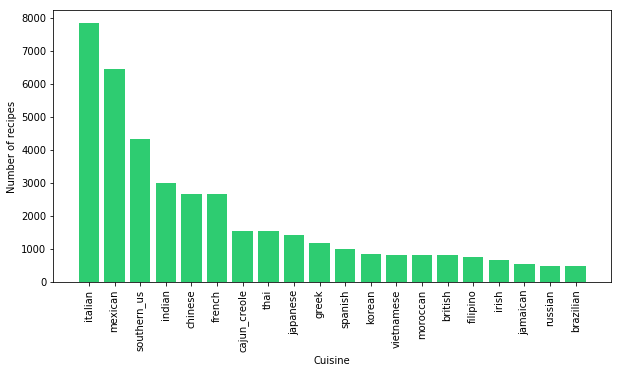

In [85]:
plt.figure(figsize=(10,5))
colors = ['#2ecc71'] * len(cuisine)
plt.bar(range(len(cuisine)), cuisine.values(), align='center', color=colors)
plt.xlabel('Cuisine', fontsize=10)
plt.ylabel('Number of recipes', fontsize=10)
plt.xticks(range(len(cuisine)), cuisine.keys(), rotation='vertical')
plt.savefig("cuisines_histogram.eps", format='eps')
plt.show()

The most common cuisine in the dataset is <font color='#2ecc71'><b>italian</b></font> (7838), <font color='#2ecc71'><b>mexican</b></font> (6438) and <font color='#2ecc71'><b>southern_us</b></font> (4320).

In [49]:
n_cuisines

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

## Ingredients

We will look at the most common ingredients overally and at the most common ingredients for each cuisine:

In [142]:
ingredients = {}

for recipe_ingr in df['ingredients']:
    for ingr in recipe_ingr:
        count = ingredients.get(ingr.lower(), 0)
        ingredients[ingr.lower()] = count + 2

In [143]:
n_ingredients = len(ingredients)

The total number of ingredients is <font color='#2ecc71'><b>{{n_ingredients}}</b></font>.

In [144]:
import operator
top_10_ingredients = dict(sorted(ingredients.items(), key=lambda tup: -tup[1])[0:10])
top_10_ingredients

{'salt': 36098,
 'onions': 15944,
 'olive oil': 15944,
 'water': 14914,
 'garlic': 14760,
 'sugar': 12868,
 'garlic cloves': 12474,
 'butter': 9696,
 'ground black pepper': 9570,
 'all-purpose flour': 9264}

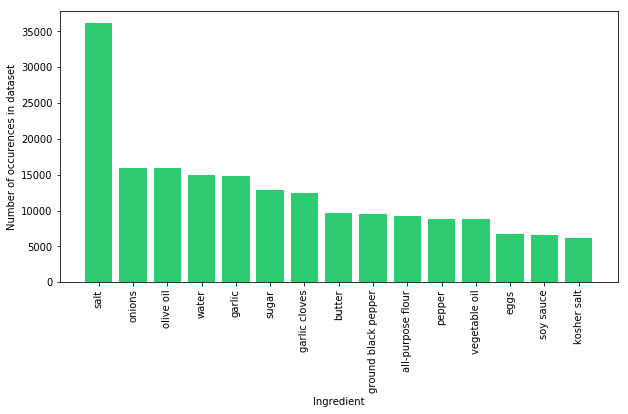

In [145]:
plt.figure(figsize=(10,5))
colors = ['#2ecc71'] * len(top_15_ingredients)
plt.bar(range(len(top_15_ingredients)), top_15_ingredients.values(), align='center', color=colors)
plt.xlabel('Ingredient', fontsize=10)
plt.ylabel('Number of occurences in dataset', fontsize=10)
plt.xticks(range(len(top_15_ingredients)), top_15_ingredients.keys(), rotation='vertical')
plt.savefig("top_15_ingredients_histogram.eps", format='eps')
plt.show()

In [146]:
from collections import Counter

counters = {}
for cuis in cuisine.keys():
    counters[cuis] = Counter()
    indices = (df['cuisine'] == cuis)
    for ingr in df[indices]['ingredients']:
        counters[cuis].update(ingr)

In [134]:
df[indices]['ingredients']

7        [sugar, pistachio nuts, white almond bark, flo...
9        [chopped tomatoes, fresh basil, garlic, extra-...
10       [pimentos, sweet pepper, dried oregano, olive ...
12       [Italian parsley leaves, walnuts, hot red pepp...
14       [fresh parmesan cheese, butter, all-purpose fl...
17       [italian seasoning, broiler-fryer chicken, may...
24       [marinara sauce, flat leaf parsley, olive oil,...
27       [ground black pepper, butter, sliced mushrooms...
30       [yellow corn meal, boiling water, butter, fres...
34       [olive oil, onions, crushed garlic, dried oreg...
36       [olive oil, bread slices, great northern beans...
40       [Oscar Mayer Deli Fresh Smoked Ham, hoagie rol...
52       [fresh basil, bay leaves, crushed red pepper, ...
54              [lemon, pesto, salmon fillets, white wine]
58       [pizza crust, plum tomatoes, pesto, part-skim ...
64       [crushed tomatoes, garlic, fresh rosemary, gro...
73       [tomatoes, red pepper, olive oil, Italian brea.

In [137]:
counters

{'italian': Counter({'sugar': 760,
          'pistachio nuts': 7,
          'white almond bark': 1,
          'flour': 142,
          'vanilla extract': 219,
          'olive oil': 3111,
          'almond extract': 56,
          'eggs': 627,
          'baking powder': 186,
          'dried cranberries': 8,
          'chopped tomatoes': 37,
          'fresh basil': 787,
          'garlic': 1471,
          'extra-virgin olive oil': 1362,
          'kosher salt': 656,
          'flat leaf parsley': 588,
          'pimentos': 16,
          'sweet pepper': 7,
          'dried oregano': 626,
          'sharp cheddar cheese': 9,
          'pepper': 965,
          'swiss cheese': 7,
          'provolone cheese': 138,
          'canola oil': 41,
          'mushrooms': 184,
          'black olives': 67,
          'sausages': 58,
          'Italian parsley leaves': 74,
          'walnuts': 38,
          'hot red pepper flakes': 76,
          'fresh lemon juice': 471,
          'trout fillet': 3,


In [138]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [168]:
top_10 = []
for c in counters:
    top_10_c = counters[c].most_common(10)
    top_10.append(items[0] for items in top_10_c)
df_top_10 = pd.DataFrame(top_10, index=[c for c in counters],
            columns=range(1, 11))
df_top_10

,1,2,3,4,5,6,7,8,9,10
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
french,salt,sugar,all-purpose flour,unsalted butter,olive oil,butter,water,large eggs,garlic cloves,ground black pepper
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water
thai,fish sauce,garlic,salt,coconut milk,vegetable oil,soy sauce,sugar,water,garlic cloves,fresh lime juice
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper


,1,2,3,4,5,6,7,8,9,10
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
french,salt,sugar,all-purpose flour,unsalted butter,olive oil,butter,water,large eggs,garlic cloves,ground black pepper
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water
thai,fish sauce,garlic,salt,coconut milk,vegetable oil,soy sauce,sugar,water,garlic cloves,fresh lime juice
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper


## Data preprocessing

Many ingredients have more than one name, like for example olive oil, soy sauce, garlic cloves, or some words use different words for describing the same ingredient like tometoes, sliced tomatoes, diced tomatoes, chopped tomatoes, plum tomatoes...